In [35]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit_ibm_provider import IBMProvider
#from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
%matplotlib inline

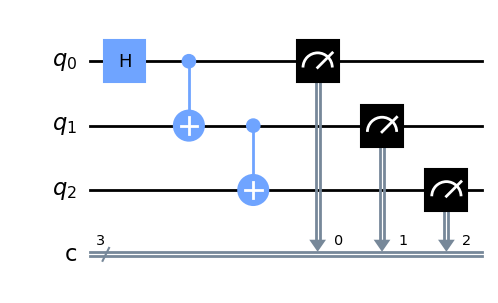

In [ ]:
num_qubits = 3
circuit = QuantumCircuit(num_qubits, num_qubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(range(num_qubits), range(num_qubits))
circuit.draw(output='mpl')

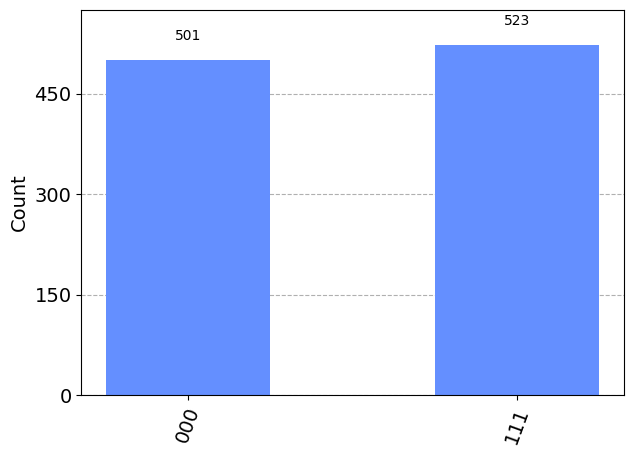

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(sim_result.get_counts(circuit))

In [40]:
provider = IBMProvider(instance="ibm-q/open/main")
device = provider.get_backend('ibmqx2')
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

AccountNotFoundError: 'No default ibm_quantum account saved.'

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

NameError: name 'job' is not defined

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], circlabel='measurement_calibration')
cal_circuits[7].draw(output='mpl')

NameError: name 'complete_meas_cal' is not defined

In [ ]:
len(cal_circuits)

NameError: name 'cal_circuits' is not defined

In [ ]:
cal_job = execute(cal_circuits, backend=device, shots=8192, optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

NameError: name 'cal_circuits' is not defined

In [ ]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

NameError: name 'cal_results' is not defined

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

NameError: name 'CompleteMeasFitter' is not defined

In [ ]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

NameError: name 'meas_fitter' is not defined

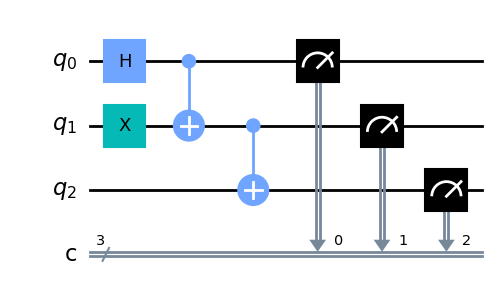

In [ ]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

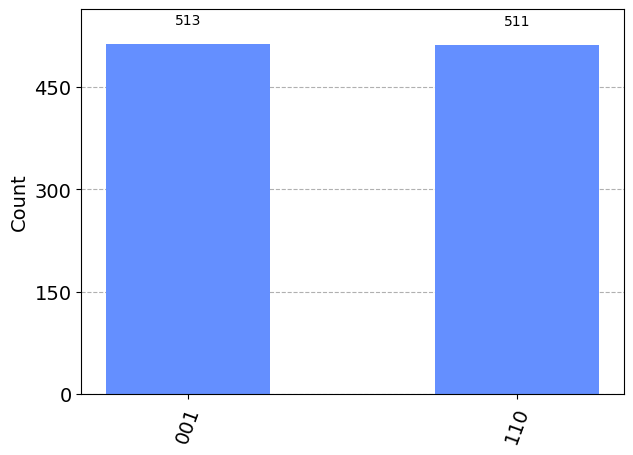

In [ ]:
plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2))

In [ ]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)
plot_histogram(device_counts_2)

NameError: name 'device' is not defined

In [ ]:
mitigated_counts_2 = meas_filter.apply(device_counts_2)
plot_histogram([device_counts_2, mitigated_counts_2], legend=['device, noisy','device, mitigated'])

NameError: name 'meas_filter' is not defined